<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Hands-on Lab : Web Scraping**


Estimated time needed: **30 to 45** minutes


## Objectives


In this lab you will perform the following:


* Extract information from a given web site 
* Write the scraped data into a csv file.


## Extract information from the given web site
You will extract the data from the below web site: <br> 


In [11]:
#this url contains the data you need to scrape
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/labs/datasets/Programming_Languages.html"

The data you need to scrape is the **name of the programming language** and **average annual salary**.<br> It is a good idea to open the url in your web broswer and study the contents of the web page before you start to scrape.


Import the required libraries


In [12]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# Step 1: Download the webpage
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/labs/datasets/Programming_Languages.html"
response = requests.get(url)
html_content = response.text


Download the webpage at the url


In [13]:
#your code goes here

Create a soup object


In [14]:

# Step 2: Create BeautifulSoup object
soup = BeautifulSoup(html_content, "html.parser")



Scrape the `Language name` and `annual average salary`.


In [15]:
# Step 3: Find the table
table = soup.find("table")

# Step 4: Extract rows
rows = []
for tr in table.find_all("tr")[1:]:  # skip header
    cols = tr.find_all("td")
    cols = [ele.text.strip() for ele in cols]
    rows.append(cols)


Save the scrapped data into a file named *popular-languages.csv*


In [16]:
# Step 5: Create DataFrame with correct column names
df = pd.DataFrame(rows, columns=["No", "Language", "Created By", "Average Annual Salary", "Learning Difficulty"])

# Keep only Language and Average Annual Salary
df = df[["Language", "Average Annual Salary"]]

# Step 6: Save to CSV
df.to_csv("popular-languages.csv", index=False)

# Preview
print(df)

     Language Average Annual Salary
0      Python              $114,383
1        Java              $101,013
2           R               $92,037
3  Javascript              $110,981
4       Swift              $130,801
5         C++              $113,865
6          C#               $88,726
7         PHP               $84,727
8         SQL               $84,793
9          Go               $94,082


<>:9: SyntaxWarning: invalid escape sequence '\$'
<>:9: SyntaxWarning: invalid escape sequence '\$'
C:\Users\Sarve\AppData\Local\Temp\ipykernel_14744\4118739346.py:9: SyntaxWarning: invalid escape sequence '\$'
  df['Average Annual Salary'] = df['Average Annual Salary'].replace('[\$,]', '', regex=True).astype(int)


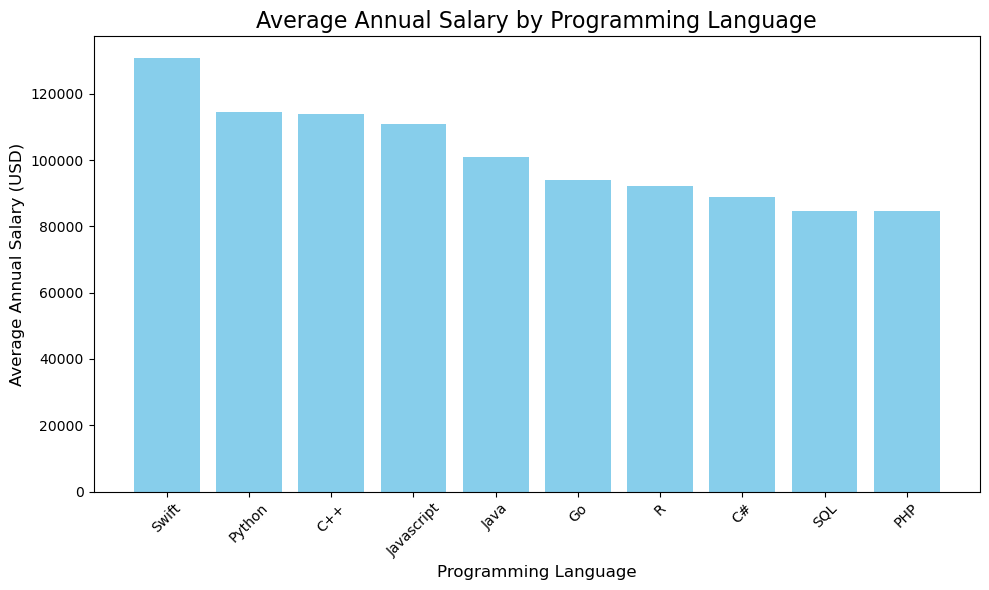

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Read the CSV
df = pd.read_csv("popular-languages.csv")

# Step 2: Clean the salary column
# Remove $ and commas, then convert to integer
df['Average Annual Salary'] = df['Average Annual Salary'].replace('[\$,]', '', regex=True).astype(int)

# Step 3: Sort the DataFrame by salary descending
df_sorted = df.sort_values(by='Average Annual Salary', ascending=False)

# Step 4: Plot the bar chart
plt.figure(figsize=(10,6))
plt.bar(df_sorted['Language'], df_sorted['Average Annual Salary'], color='skyblue')
plt.title('Average Annual Salary by Programming Language', fontsize=16)
plt.xlabel('Programming Language', fontsize=12)
plt.ylabel('Average Annual Salary (USD)', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


|  Date (YYYY-MM-DD) |  Version | Changed By  |  Change Description |
|---|---|---|---|
| 2020-10-17  | 0.1  | Ramesh Sannareddy  |  Created initial version of the lab |


 Copyright &copy; 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2022-01-01).
